In [1]:
import os
import torch
import torch.nn as nn

from model import MLP
from config import get_config
from train import get_model, grid_search, get_ds

import pickle

In [2]:
config = get_config()
train_dataloader, val_dataloader, test_dataloader = get_ds(config)

In [5]:
len(train_dataloader.dataset)

40009

In [6]:
len(val_dataloader.dataset)

8800

In [7]:
len(test_dataloader.dataset)

8800

In [5]:
data_loader.dataset[0]['encoder_input'].shape

torch.Size([659])

In [7]:
model = get_model(config)
model

MLP(
  (fc1): Linear(in_features=659, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [8]:
config["model_folder"] = "cv_weights"
config["experiment_name"] = "cv_run/tmodel"
config["run"] = "cv_run"

param_grid = {
    "hidden_dim": [64, 128, 256, 512, 1024],
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
res = grid_search(config, device, lr_cv = 10**-3, n_epoch = 50, param_grid = param_grid)

hyperparams: hidden_dim: 512
Fold 0:


100%|██████████| 50/50 [00:11<00:00,  4.26it/s]


[33139.61328125, 29393.7265625, 27268.916015625, 25383.048828125, 24041.841796875, 22987.150390625, 22266.37109375, 21463.041015625, 21677.310546875, 20993.98046875, 20587.21484375, 20591.501953125, 20439.7734375, 19806.490234375, 19579.607421875, 19854.259765625, 19835.037109375, 19253.869140625, 19281.630859375, 19168.689453125, 19199.466796875, 19063.005859375, 18989.509765625, 19718.123046875, 19563.75390625, 19657.77734375, 19855.15625, 19780.873046875, 19553.87890625, 19849.76953125, 19705.517578125, 21318.0625, 20421.76953125, 20505.076171875, 20406.919921875, 20121.482421875, 21707.58984375, 21420.27734375, 22110.25, 22165.283203125, 22843.603515625, 22703.748046875, 22323.4921875, 22476.3203125, 24130.228515625, 23407.095703125, 24173.759765625, 24838.798828125, 24824.822265625, 23932.123046875]
Fold 1:


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]


[23638.98828125, 20742.69921875, 18912.703125, 17732.71875, 16822.302734375, 16051.9267578125, 15383.42578125, 15261.3515625, 14864.86328125, 14823.7373046875, 14856.119140625, 14655.3701171875, 14283.2275390625, 14696.8291015625, 14694.169921875, 14539.611328125, 14701.705078125, 14625.0673828125, 15308.2529296875, 14785.4423828125, 14608.2568359375, 14569.2666015625, 14679.8359375, 14828.1806640625, 15189.0537109375, 14660.0634765625, 15145.4296875, 14921.0634765625, 14966.693359375, 15028.9765625, 15437.0029296875, 14764.72265625, 15206.4345703125, 14811.4921875, 15230.888671875, 15199.2255859375, 15311.3916015625, 15315.546875, 15988.6396484375, 15203.734375, 15341.666015625, 15500.21484375, 15373.03515625, 15523.767578125, 15805.1181640625, 15571.421875, 15874.7021484375, 15597.1669921875, 15604.0791015625, 15859.5673828125]
Fold 2:


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


[21794.583984375, 18971.9453125, 17831.693359375, 17220.69140625, 16594.25390625, 16529.90625, 16521.2734375, 16438.716796875, 16418.029296875, 16498.65234375, 16395.23828125, 16346.212890625, 16194.404296875, 16098.8076171875, 16499.294921875, 16138.291015625, 16388.064453125, 16159.982421875, 16605.521484375, 16260.08984375, 16166.2451171875, 16492.591796875, 16049.1123046875, 16199.5576171875, 16318.2392578125, 16349.78125, 16377.8759765625, 16676.220703125, 16744.5, 16389.900390625, 16781.26953125, 16430.2734375, 16484.609375, 16985.498046875, 16297.205078125, 16454.572265625, 16701.0078125, 16866.142578125, 16605.77734375, 16422.23828125, 16848.953125, 17088.013671875, 17077.912109375, 16915.6484375, 16837.73828125, 16846.80859375, 17076.056640625, 17136.673828125, 16838.080078125, 17147.884765625]
Fold 3:


100%|██████████| 50/50 [00:50<00:00,  1.01s/it]


[24887.166015625, 24091.943359375, 23434.951171875, 22462.37890625, 21756.22265625, 20734.669921875, 19533.994140625, 18185.603515625, 17175.828125, 16999.583984375, 16247.5185546875, 17074.267578125, 16578.4296875, 17152.66796875, 17900.576171875, 17152.7109375, 16890.9375, 18246.875, 17713.166015625, 17757.994140625, 18633.048828125, 20100.048828125, 20597.455078125, 21635.052734375, 22757.51171875, 23192.546875, 26079.6875, 26891.419921875, 26971.658203125, 31973.6796875, 33394.0234375, 35960.62890625, 37829.625, 35991.12890625, 35116.12890625, 38451.60546875, 41207.02734375, 44998.3046875, 43061.55078125, 50429.5625, 47147.12109375, 48845.421875, 48256.484375, 54930.7890625, 60326.58203125, 58974.41796875, 59551.9140625, 58600.8828125, 67017.2109375, 70849.46875]
--------------------
hyperparams: hidden_dim: 128
Fold 0:


100%|██████████| 50/50 [00:13<00:00,  3.85it/s]


[35006.8984375, 32637.802734375, 30455.23046875, 28611.806640625, 27283.380859375, 26676.228515625, 25012.71875, 24287.923828125, 23778.638671875, 23475.36328125, 22910.529296875, 22434.935546875, 22326.470703125, 21752.90234375, 21820.05078125, 21108.244140625, 20887.455078125, 20880.55859375, 20722.1796875, 20537.087890625, 20476.8125, 20176.693359375, 20784.681640625, 20243.224609375, 20209.68359375, 20042.98828125, 19795.720703125, 20193.642578125, 20020.001953125, 20344.5546875, 20377.353515625, 20450.361328125, 20096.953125, 20404.318359375, 20374.9375, 20629.650390625, 20947.701171875, 21234.693359375, 21115.248046875, 21512.67578125, 21129.375, 21382.767578125, 22081.96484375, 22538.8125, 22398.26171875, 22725.486328125, 22495.99609375, 23407.447265625, 23987.16796875, 24240.166015625]
Fold 1:


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


[27090.505859375, 23767.560546875, 21184.037109375, 20140.982421875, 18998.791015625, 17899.99609375, 16752.484375, 16429.220703125, 15749.4267578125, 15370.6328125, 15042.173828125, 14766.4794921875, 14651.71875, 14636.978515625, 14594.611328125, 14440.2744140625, 14394.0888671875, 14136.9814453125, 14114.1533203125, 14266.861328125, 14152.173828125, 14139.533203125, 14087.521484375, 14225.6953125, 14338.8466796875, 14156.9521484375, 14451.626953125, 14283.8115234375, 14197.6572265625, 14166.185546875, 14128.265625, 14194.70703125, 14173.8056640625, 14183.8701171875, 14442.4775390625, 14200.509765625, 14311.240234375, 14375.978515625, 14318.3125, 14188.908203125, 14319.8994140625, 14286.1015625, 14195.0615234375, 14264.7060546875, 14493.31640625, 14328.369140625, 14213.8037109375, 14477.9755859375, 14471.7197265625, 14179.861328125]
Fold 2:


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


[24642.326171875, 20708.5859375, 19125.859375, 18304.041015625, 17573.30859375, 17430.82421875, 17030.95703125, 16851.525390625, 16676.2578125, 16698.193359375, 16675.130859375, 16749.244140625, 16343.099609375, 16430.3515625, 16390.677734375, 16303.478515625, 16386.55078125, 16333.0029296875, 16148.810546875, 16206.640625, 16294.583984375, 16284.5771484375, 16136.5703125, 16175.2734375, 16181.55859375, 16108.3310546875, 16181.12109375, 16292.462890625, 16150.9658203125, 16155.8046875, 16120.9423828125, 16024.39453125, 16176.4775390625, 16026.90234375, 16171.4970703125, 16184.3759765625, 16183.736328125, 16010.6171875, 15967.4072265625, 16206.8271484375, 16185.7607421875, 16150.71484375, 16166.5615234375, 16179.98046875, 16008.0771484375, 16165.244140625, 16077.66796875, 16132.146484375, 16065.5498046875, 16246.3994140625]
Fold 3:


100%|██████████| 50/50 [00:48<00:00,  1.04it/s]


[25793.205078125, 25802.421875, 25542.322265625, 25193.064453125, 24924.83984375, 24649.287109375, 24095.69140625, 24143.677734375, 24076.501953125, 23328.6015625, 23205.20703125, 24128.98046875, 24218.08203125, 25238.767578125, 26563.203125, 28773.640625, 32480.724609375, 34343.6328125, 34480.13671875, 35147.015625, 32177.177734375, 33221.1796875, 39994.92578125, 42663.63671875, 41288.1796875, 43635.296875, 40867.93359375, 44419.7265625, 50838.09765625, 45686.1796875, 49200.703125, 44024.36328125, 42584.33984375, 47818.359375, 56720.64453125, 47072.390625, 54271.39453125, 52083.2109375, 56266.51171875, 52048.953125, 55531.015625, 52544.35546875, 59590.99609375, 63841.51171875, 64232.3828125, 71050.0, 79262.3984375, 75637.484375, 70568.65625, 76951.4921875]
--------------------
hyperparams: hidden_dim: 64
Fold 0:


100%|██████████| 50/50 [00:12<00:00,  3.86it/s]


[35699.35546875, 33535.703125, 32005.794921875, 30267.5703125, 29325.53515625, 27802.66015625, 26783.470703125, 26044.466796875, 25136.02734375, 24840.828125, 23933.751953125, 23852.31640625, 23363.625, 23031.2734375, 22713.08203125, 22359.484375, 22096.982421875, 21930.953125, 21561.6015625, 21343.84765625, 21098.87109375, 21019.58203125, 20709.037109375, 20598.9609375, 20381.880859375, 20295.291015625, 20283.408203125, 20005.853515625, 19963.4609375, 19881.783203125, 19799.228515625, 19711.455078125, 19450.46875, 19357.009765625, 19220.494140625, 19346.00390625, 19180.6484375, 19151.94140625, 18869.595703125, 18946.720703125, 18863.23828125, 18736.48828125, 18863.005859375, 18920.140625, 18812.1796875, 18869.009765625, 18776.791015625, 18537.005859375, 18843.140625, 18690.19140625]
Fold 1:


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]


[28488.423828125, 26033.32421875, 23688.837890625, 22305.5078125, 20897.515625, 19716.99609375, 18674.85546875, 17873.703125, 17385.94140625, 16471.5234375, 16161.8291015625, 15655.9521484375, 15381.90625, 15400.296875, 15107.5009765625, 14997.7470703125, 14716.9208984375, 14771.900390625, 14504.4619140625, 14432.7919921875, 14514.1123046875, 14440.5029296875, 14315.755859375, 14375.6650390625, 14372.26171875, 14242.396484375, 14342.0, 14259.859375, 14246.859375, 14320.7431640625, 14312.5185546875, 14239.955078125, 14130.009765625, 14341.86328125, 14214.3095703125, 14245.13671875, 14311.8125, 14206.65234375, 14208.041015625, 14289.421875, 14345.587890625, 14213.2216796875, 14191.3671875, 14214.8935546875, 14268.6123046875, 14158.9716796875, 14386.47265625, 14282.0390625, 14399.1982421875, 14372.166015625]
Fold 2:


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


[26756.578125, 22280.810546875, 20391.4140625, 19204.5546875, 18493.181640625, 17998.296875, 17640.6875, 17276.58984375, 17293.662109375, 17099.091796875, 16885.453125, 16869.927734375, 16767.814453125, 16770.697265625, 16647.11328125, 16604.37109375, 16360.5126953125, 16462.19921875, 16364.95703125, 16473.599609375, 16388.28515625, 16334.1923828125, 16352.658203125, 16333.544921875, 16156.826171875, 16264.1513671875, 16423.796875, 16425.658203125, 16384.689453125, 16174.1591796875, 16179.693359375, 16443.85546875, 16204.7001953125, 16369.1083984375, 16120.041015625, 16176.140625, 16088.7783203125, 16066.2158203125, 16132.5595703125, 16343.6376953125, 16136.326171875, 16172.6796875, 16142.5126953125, 16175.3203125, 16219.8935546875, 16099.986328125, 16194.2109375, 16203.7099609375, 16215.732421875, 16143.162109375]
Fold 3:


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


[25997.287109375, 26175.478515625, 26090.203125, 26004.349609375, 25614.388671875, 25041.44921875, 24384.0546875, 23404.70703125, 22354.505859375, 22509.328125, 22222.76171875, 23244.986328125, 24066.4140625, 25381.9453125, 28600.57421875, 27357.986328125, 29647.744140625, 32940.74609375, 35040.5390625, 37922.328125, 34890.18359375, 40569.37890625, 42009.5859375, 45176.62109375, 41010.23828125, 40527.87890625, 40033.453125, 46622.05078125, 47566.8125, 50608.6328125, 65699.2734375, 53909.171875, 49200.6640625, 51358.67578125, 50786.09765625, 60520.5625, 56182.046875, 63514.44140625, 59434.10546875, 64217.4296875, 56049.86328125, 64409.6953125, 58835.31640625, 67329.859375, 60176.61328125, 68376.5078125, 72206.8125, 73960.6796875, 65421.578125, 74555.828125]
--------------------
hyperparams: hidden_dim: 256
Fold 0:


100%|██████████| 50/50 [00:12<00:00,  3.86it/s]


[33829.70703125, 31027.28125, 28495.4453125, 26836.724609375, 25138.845703125, 24638.72265625, 23636.349609375, 23114.97265625, 22328.212890625, 21809.12890625, 21430.1953125, 21086.5859375, 20705.845703125, 20838.01171875, 20405.5546875, 20002.853515625, 20105.916015625, 20043.48828125, 19647.02734375, 19393.205078125, 19593.3046875, 19316.240234375, 19550.86328125, 19525.830078125, 19425.828125, 19411.73046875, 19019.021484375, 19357.275390625, 19056.541015625, 19333.8984375, 19504.142578125, 19524.4765625, 20099.03125, 19838.013671875, 20090.943359375, 20002.150390625, 20236.4609375, 20001.50390625, 20515.078125, 20621.59375, 20899.076171875, 20829.8515625, 21032.876953125, 21393.16015625, 22110.939453125, 21998.869140625, 21873.849609375, 22087.85546875, 22880.955078125, 23221.80078125]
Fold 1:


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


[25264.998046875, 21954.7578125, 20010.150390625, 18727.939453125, 17757.21484375, 16667.474609375, 16216.6181640625, 15475.3662109375, 15403.8173828125, 14964.6181640625, 14616.005859375, 14517.7353515625, 14436.8798828125, 14401.0400390625, 14406.326171875, 14495.6162109375, 14346.5654296875, 14229.6181640625, 14495.0615234375, 14244.802734375, 14485.6484375, 14288.666015625, 14209.8837890625, 14345.9794921875, 14386.35546875, 14552.1806640625, 14507.4912109375, 14562.607421875, 14732.4931640625, 14494.5029296875, 14419.240234375, 14445.6591796875, 14380.3525390625, 14583.0615234375, 14748.0947265625, 14489.3330078125, 15111.7587890625, 14846.2294921875, 14868.87890625, 15173.8359375, 14620.62890625, 14902.6435546875, 14776.0576171875, 14679.1708984375, 15083.798828125, 14745.4033203125, 14578.876953125, 15115.5087890625, 14934.2802734375, 15233.6015625]
Fold 2:


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


[23337.439453125, 19667.611328125, 18507.740234375, 17493.62109375, 16989.716796875, 17278.626953125, 16674.994140625, 16491.28515625, 16612.8203125, 16416.732421875, 16430.025390625, 16095.16015625, 16241.0732421875, 16520.91015625, 16196.486328125, 16304.154296875, 16198.31640625, 16490.875, 16413.044921875, 16254.6337890625, 16211.3583984375, 16198.345703125, 16076.87890625, 16402.119140625, 16406.552734375, 16014.8701171875, 16038.4130859375, 16569.5234375, 16211.6865234375, 16434.62109375, 16196.1572265625, 16097.4326171875, 16200.9365234375, 16342.51171875, 16322.8564453125, 16283.0400390625, 16200.9775390625, 16398.3515625, 16220.705078125, 16294.978515625, 16383.4150390625, 16213.7001953125, 16244.974609375, 16250.267578125, 16422.55078125, 16559.8515625, 16119.740234375, 16472.26171875, 16309.4267578125, 16260.3623046875]
Fold 3:


100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


[25532.591796875, 25419.884765625, 25073.640625, 24573.017578125, 23794.0, 23163.791015625, 22524.326171875, 21466.83203125, 20860.79296875, 19584.06640625, 19328.466796875, 18548.482421875, 20434.900390625, 19782.197265625, 17489.001953125, 19295.1015625, 19577.083984375, 19704.44921875, 20246.919921875, 20986.4609375, 20956.4453125, 20224.546875, 22430.529296875, 23892.232421875, 23594.94140625, 26357.080078125, 27941.826171875, 28155.2421875, 27702.564453125, 31007.63671875, 31328.556640625, 31990.060546875, 33309.015625, 34176.375, 33732.94921875, 34816.85546875, 37315.08984375, 38485.41796875, 38157.953125, 37894.3125, 39782.625, 41484.3828125, 41930.8515625, 42040.125, 44885.1484375, 43910.4140625, 45085.6796875, 48339.4609375, 47023.40625, 47092.79296875]
--------------------
hyperparams: hidden_dim: 1024
Fold 0:


100%|██████████| 50/50 [00:13<00:00,  3.77it/s]


[32280.40234375, 28465.955078125, 25380.283203125, 24485.60546875, 22986.919921875, 22032.26953125, 21589.576171875, 21250.439453125, 20950.64453125, 20539.78515625, 20508.802734375, 19877.025390625, 20051.3828125, 20837.884765625, 20092.4296875, 20222.29296875, 20931.63671875, 20340.1171875, 20517.95703125, 20696.189453125, 21749.328125, 21623.232421875, 21481.962890625, 22581.015625, 22228.626953125, 22283.650390625, 23132.962890625, 23360.171875, 24189.517578125, 25143.736328125, 25057.134765625, 24404.99609375, 26508.724609375, 28543.76171875, 26895.349609375, 28751.71484375, 28619.26953125, 28742.4609375, 30391.86328125, 30988.595703125, 30954.203125, 32715.009765625, 32183.19140625, 37389.09375, 35188.0703125, 35455.26171875, 36774.515625, 41078.296875, 39579.4609375, 42081.75]
Fold 1:


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]


[21873.125, 18900.810546875, 17628.76953125, 16628.423828125, 16286.287109375, 15193.78515625, 15423.638671875, 15179.7353515625, 14697.7353515625, 14681.1005859375, 14951.7412109375, 14836.6005859375, 14867.6142578125, 14762.4365234375, 14571.9384765625, 14691.8076171875, 14658.2294921875, 15009.3369140625, 14940.6943359375, 14784.8310546875, 15087.751953125, 15418.3369140625, 15423.216796875, 16040.8251953125, 14971.4970703125, 15199.0419921875, 15080.009765625, 15335.5048828125, 15294.2490234375, 15065.9560546875, 15137.2666015625, 15293.5908203125, 16229.5712890625, 15667.4541015625, 15967.6201171875, 15421.6337890625, 15684.3828125, 16396.94140625, 16092.2119140625, 15724.001953125, 16679.52734375, 15928.1513671875, 15832.673828125, 16347.5068359375, 16796.857421875, 15979.7080078125, 16564.345703125, 16641.57421875, 16616.556640625, 16366.91796875]
Fold 2:


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


[20731.125, 18123.419921875, 17821.0859375, 17260.30078125, 16893.4765625, 16998.119140625, 16628.126953125, 16694.671875, 16415.8125, 16363.3173828125, 16596.21484375, 16481.9375, 16959.123046875, 16201.5654296875, 16909.9921875, 16192.060546875, 16597.568359375, 16271.9599609375, 16428.787109375, 16287.400390625, 16189.6357421875, 16386.630859375, 16446.97265625, 16189.1337890625, 16124.314453125, 16080.85546875, 16311.29296875, 16581.388671875, 16480.7109375, 16401.970703125, 16423.41015625, 16661.69921875, 16484.173828125, 17060.271484375, 16837.22265625, 16506.15234375, 16240.8017578125, 17244.10546875, 16297.5771484375, 16658.064453125, 16637.314453125, 16733.830078125, 16829.5078125, 16630.625, 16989.55859375, 16526.6953125, 17143.51953125, 16683.3515625, 16669.787109375, 16625.373046875]
Fold 3:


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]

[24000.896484375, 22933.595703125, 22077.29296875, 21075.74609375, 19980.974609375, 19113.205078125, 17351.056640625, 17726.998046875, 17039.92578125, 16818.55078125, 15716.5439453125, 16786.142578125, 17754.7578125, 16448.3203125, 17349.75, 18775.490234375, 17136.32421875, 18411.20703125, 18332.087890625, 18059.28515625, 18687.53125, 19322.974609375, 20581.560546875, 20336.384765625, 22352.09375, 22668.748046875, 23901.142578125, 26272.669921875, 26540.755859375, 27588.033203125, 28496.611328125, 28391.72265625, 30298.298828125, 33761.28125, 34469.1875, 34803.39453125, 38937.17578125, 41357.96484375, 45625.953125, 43784.41796875, 44785.08203125, 48076.09765625, 45168.6484375, 51281.08984375, 60057.05078125, 60122.9609375, 68630.09375, 72135.640625, 62195.67578125, 60679.04296875]
--------------------


In [10]:
res['score_list']

[[18989.509765625, 14283.2275390625, 16049.1123046875, 16247.5185546875],
 [19795.720703125, 14087.521484375, 15967.4072265625, 23205.20703125],
 [18537.005859375, 14130.009765625, 16066.2158203125, 22222.76171875],
 [19019.021484375, 14209.8837890625, 16014.8701171875, 17489.001953125],
 [19877.025390625, 14571.9384765625, 16080.85546875, 15716.5439453125]]

In [11]:
res['avg_score']

[16392.342041015625,
 18263.964111328125,
 17738.998291015625,
 16683.1943359375,
 16561.5908203125]

In [12]:
res["params"]

[{'hidden_dim': 512},
 {'hidden_dim': 128},
 {'hidden_dim': 64},
 {'hidden_dim': 256},
 {'hidden_dim': 1024}]

In [23]:
final_scores["score_list"][0]

[17287.005859375, 22658.6796875, 39408.140625, 38283.515625, 17025.775390625]

In [3]:
in_dim = len(cfg["exo_vars"] + cfg["target"])*cfg["src_seq_len"]
optimus = MLP(in_dim, cfg["hidden_dim"], cfg["tgt_seq_len"])
batch_size = 64

num_features = len(cfg["exo_vars"] + cfg["target"])
in_seq = cfg["src_seq_len"]
out_seq = cfg["tgt_seq_len"]

X = torch.rand(batch_size, in_seq, num_features)
y = torch.rand(batch_size, out_seq)

In [19]:
X.view(-1, in_dim).shape

torch.Size([64, 2624])

In [21]:
output = optimus(X.view(-1, in_dim))

In [8]:
seq_datapoint = {
    "true": torch.rand(8, out_seq).numpy(),
    "pred": torch.rand(8, out_seq).numpy(),
    "hist": torch.rand(in_seq, 1).numpy()
}

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [32]:
def plot_results(seq_datapoint: dict, num_models: int, history_len: int) -> plt.figure:
    d0 = [i for i in range(history_len)]
    d = [i for i in range(history_len, history_len+num_models)]

    fig, ax = plt.subplots()
    ax.plot(d0, seq_datapoint['hist'], label="History", color='g')

    if num_models == 1:
        ax.plot(d, seq_datapoint['true'], label="Ground Truth", marker='o', color='b')
        ax.plot(d, seq_datapoint['pred'], label="Predicted", marker='o', color='r')
    else:
        ax.plot(d, seq_datapoint['true'], label="Ground Truth", color='b')
        ax.plot(d, seq_datapoint['pred'], label="Predicted", color='r')

    # Add loss
    rmse_loss = mean_squared_error(seq_datapoint['true'], seq_datapoint['pred'], squared=False)
    mae_loss = mean_absolute_error(seq_datapoint['true'], seq_datapoint['pred'])

    ax.text(-1, 1, f'RMSE: {rmse_loss:.2f}', fontsize=12, ha='left')
    ax.text(-1, 0.95, f'MAE: {mae_loss:.2f}', fontsize=12, ha='left')

    # Add labels and legend
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

    # Return the figure
    return fig

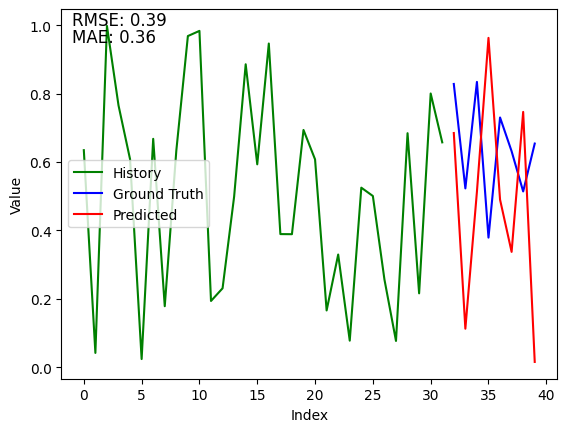

In [33]:
f = plot_results(seq_datapoint, 8, 32)